In [ ]:
#Bike Sharing Demand Prediction

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
dataset = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [ ]:
print("Dataset Shape:", dataset.shape)
print("Columns:", dataset.columns.tolist())
print(dataset.head())

Dataset Shape: (730, 16)
Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  

In [ ]:
# Convert date column (handles DD-MM-YYYY)
try:
    dataset["dteday"] = pd.to_datetime(dataset["dteday"], dayfirst=True, errors="coerce")
except Exception as e:
    print("Date conversion error:", e)

In [ ]:
# drop unnecessary columns
drop_cols = [c for c in ["instant", "dteday", "casual", "registered"] if c in dataset.columns]
dataset = dataset.drop(drop_cols, axis=1)

In [ ]:
# check missing values
print("Missing values:\n", dataset.isnull().sum())

Missing values:
 season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


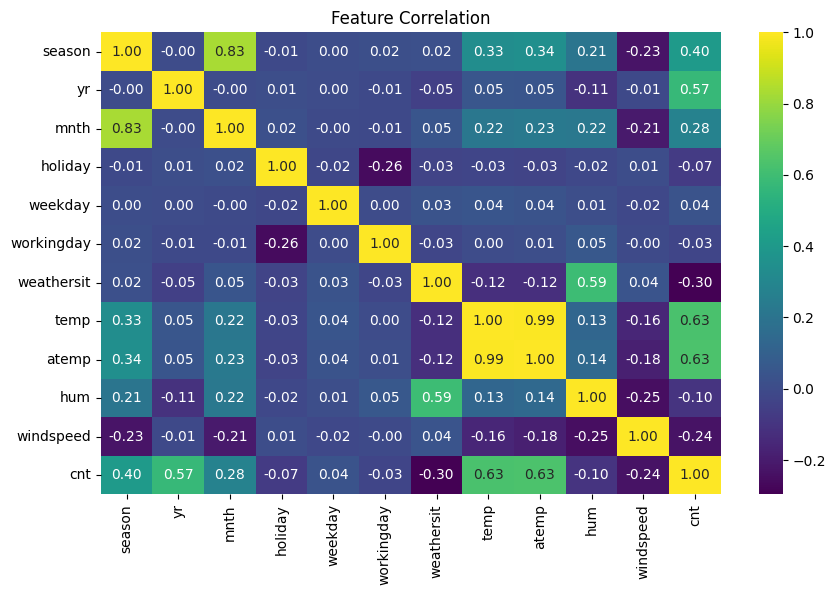

In [ ]:
# Visualization
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

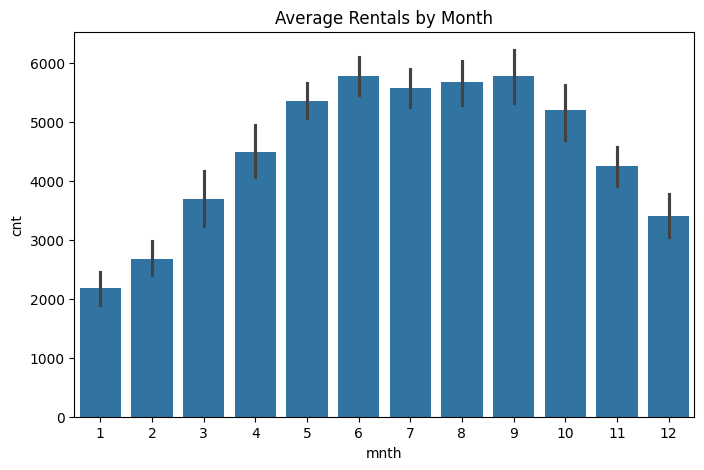

In [ ]:
if "mnth" in dataset.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x="mnth", y="cnt", data=dataset, estimator=np.mean)
    plt.title("Average Rentals by Month")
    plt.show()

In [ ]:
# modeling

X = dataset.drop("cnt", axis=1)
y = dataset["cnt"]

In [ ]:
# one-hot encode categorical variables
cat_cols = ["season", "weathersit", "mnth", "weekday"]
X = pd.get_dummies(X, columns=[c for c in cat_cols if c in X.columns], drop_first=True)

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
# evaluation

y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.9011580432119767
RMSE: 581.653159454225


Top Features:
 temp            0.343263
yr              0.270611
atemp           0.179765
hum             0.058474
season_4        0.039949
windspeed       0.034087
weathersit_3    0.019481
season_2        0.005761
weathersit_2    0.005512
weekday_1       0.004153
dtype: float64


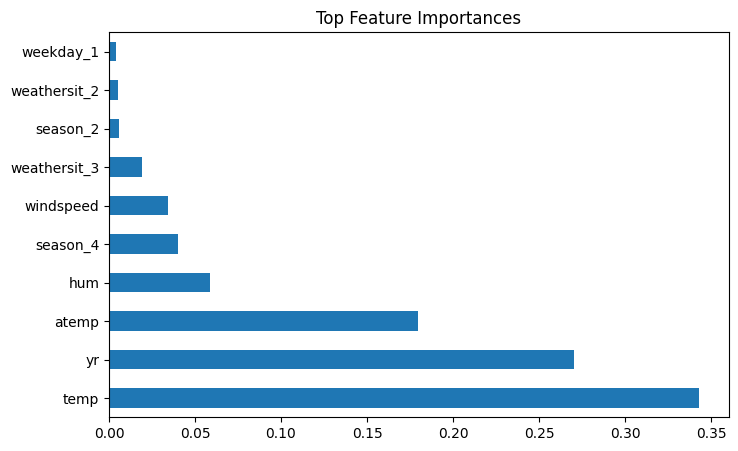

In [ ]:
# feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", feat_imp.head(10))

plt.figure(figsize=(8,5))
feat_imp.head(10).plot(kind="barh")
plt.title("Top Feature Importances")
plt.show()